## Imports

In [1]:
from road_framework import Modelo_CNN
import xai_funcs
import tensorflow as tf
import numpy as np

## Import do Modelo

In [2]:
modelo = Modelo_CNN()
modelo.setup()
print("Precisão:", modelo.model_accuracy())

A criar datasets
Found 24997 files belonging to 2 classes.
Using 17498 files for training.


I0000 00:00:1767825323.934015   80647 gpu_device.cc:2020] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 6624 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 2070, pci bus id: 0000:07:00.0, compute capability: 7.5


Found 24997 files belonging to 2 classes.
Using 7499 files for validation.
Shape das Imagens: (32, 128, 128, 3)
Exemplo de Labels: [0 0 1 0 0 0 1 0 1 0 1 0 0 1 0 1 1 1 0 1 0 0 1 1 0 0 0 1 0 1 1 1]
Train: 17504
Val: 3744
Test: 3776
Datasets Criados
Modelo encontrado!
Precisão: 0.9845539331436157


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ preprocessing (Sequential)      │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ efficientnetb0 (Functional)     │ (None, 4, 4, 1280)     │     4,049,571 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       327,936 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu (ReLU)                    │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_1 (ReLU)                  │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │           258 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ predictions (Activation)        │ (None, 2)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,066,979 (49.85 MB)

 Trainable params: 4,327,390 (16.51 MB)

 Non-trainable params: 84,807 (331.28 KB)

 Optimizer params: 8,654,782 (33.02 MB)

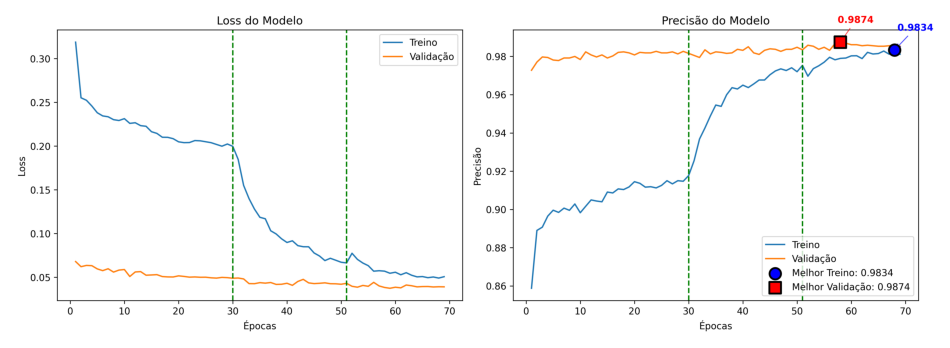

In [3]:
modelo.display_model_info()

In [13]:
imagens = []
labels = []
    
# Iterar sobre o dataset de teste (que está na instância da tua classe)
for img, label in modelo.test_ds.unbatch():
    imagens.append(img.numpy())
    labels.append(label.numpy())
    
imagens = np.array(imagens)
labels = np.array(labels)
    
# 2. Selecionar um índice aleatório
idx_aleatorio = np.random.randint(0, len(imagens))
imagem_escolhida = imagens[idx_aleatorio]
label_real = int(labels[idx_aleatorio])

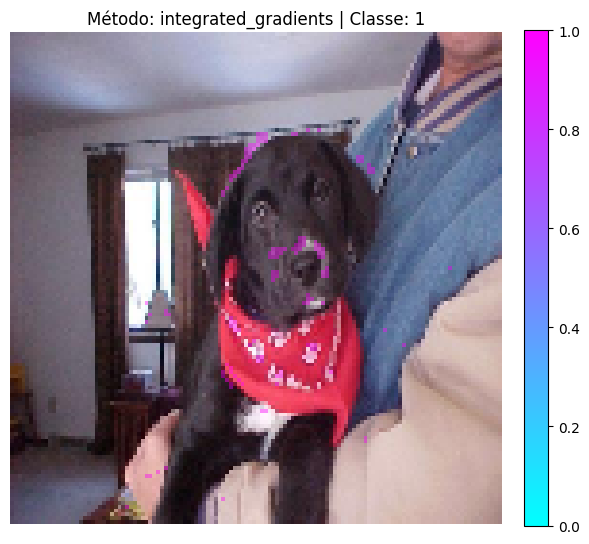

In [14]:
xai_funcs.display_explanation(
    model=modelo.modelo,
    image=imagem_escolhida,
    label=label_real,
    method_name="integrated_gradients",
    threshold=0,  # Ajusta para filtrar mais ou menos ruído
    alpha=0.4       # Transparência do mapa de calor
)

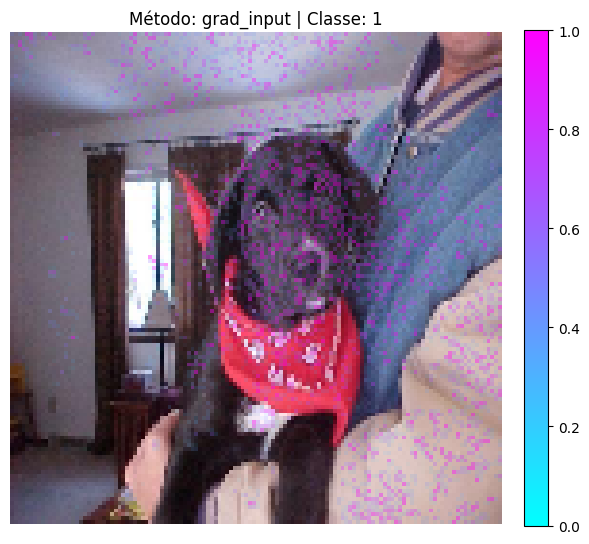

In [18]:
xai_funcs.display_explanation(
    model=modelo.modelo,
    image=imagem_escolhida,
    label=label_real,
    method_name="grad_input",
    threshold=0,
    alpha=0.4
)

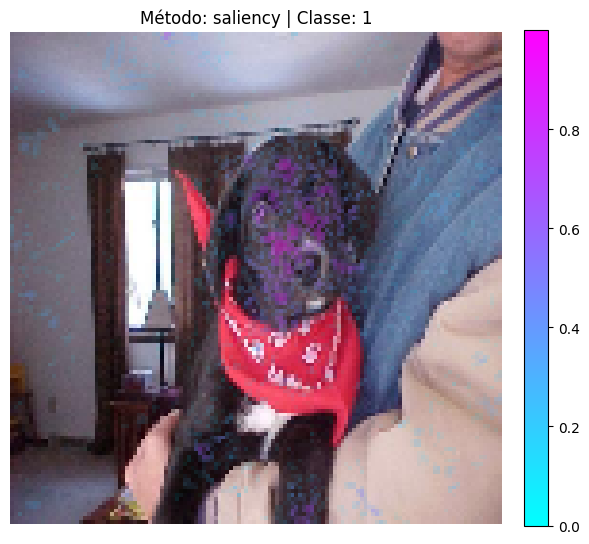

In [17]:
xai_funcs.display_explanation(
    model=modelo.modelo,
    image=imagem_escolhida,
    label=label_real,
    method_name="saliency",
    threshold=0.1,
    alpha=0.4
)

In [19]:
# 1. Definir os alvos
amostras_por_classe = 500
x_test_500 = []
y_test_500 = []

# 2. Contadores para garantir o equilíbrio
contagem_gatos = 0  # Classe 0
contagem_caes = 0   # Classe 1

print("Iniciando a extração de 500 instâncias por classe...")

# 3. Iterar pelo dataset de teste (unbatch permite ver uma imagem por vez)
for img, label in modelo.test_ds.unbatch():
    classe = int(label.numpy())
    
    if classe == 0 and contagem_gatos < amostras_por_classe:
        x_test_500.append(img.numpy())
        y_test_500.append(classe)
        contagem_gatos += 1
    elif classe == 1 and contagem_caes < amostras_por_classe:
        x_test_500.append(img.numpy())
        y_test_500.append(classe)
        contagem_caes += 1
        
    # Parar se já tivermos as 1000 imagens
    if contagem_gatos == amostras_por_classe and contagem_caes == amostras_por_classe:
        break

# 4. Converter para arrays numpy
x_test_500 = np.array(x_test_500)
y_test_500 = np.array(y_test_500)

print(f"Extração concluída!")
print(f"Total de imagens: {len(x_test_500)}")
print(f"Gatos: {np.sum(y_test_500 == 0)} | Cães: {np.sum(y_test_500 == 1)}")

Iniciando a extração de 500 instâncias por classe...
Extração concluída!
Total de imagens: 1000
Gatos: 500 | Cães: 500


In [25]:
import quantus

metric = quantus.metrics.faithfulness.road(
    nr_runs=10, 
    subset_size=100,
    perturb_fraction=0.1,
    perturb_baseline="linear",
    discretise=False
)

TypeError: 'module' object is not callable